Un árbol de decisión es un modelo predictivo que se utiliza tanto para clasificación como para regresión. Se construye dividiendo recursivamente el conjunto de datos en función de las características de los datos.
En nuestro modelo, tenemos el mismo objetivo que en la regresión logística.

c:\Users\lalos\OneDrive\Escritorio\proyecto temperatura\.venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Mejores parámetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy en el conjunto de prueba: 1.0000


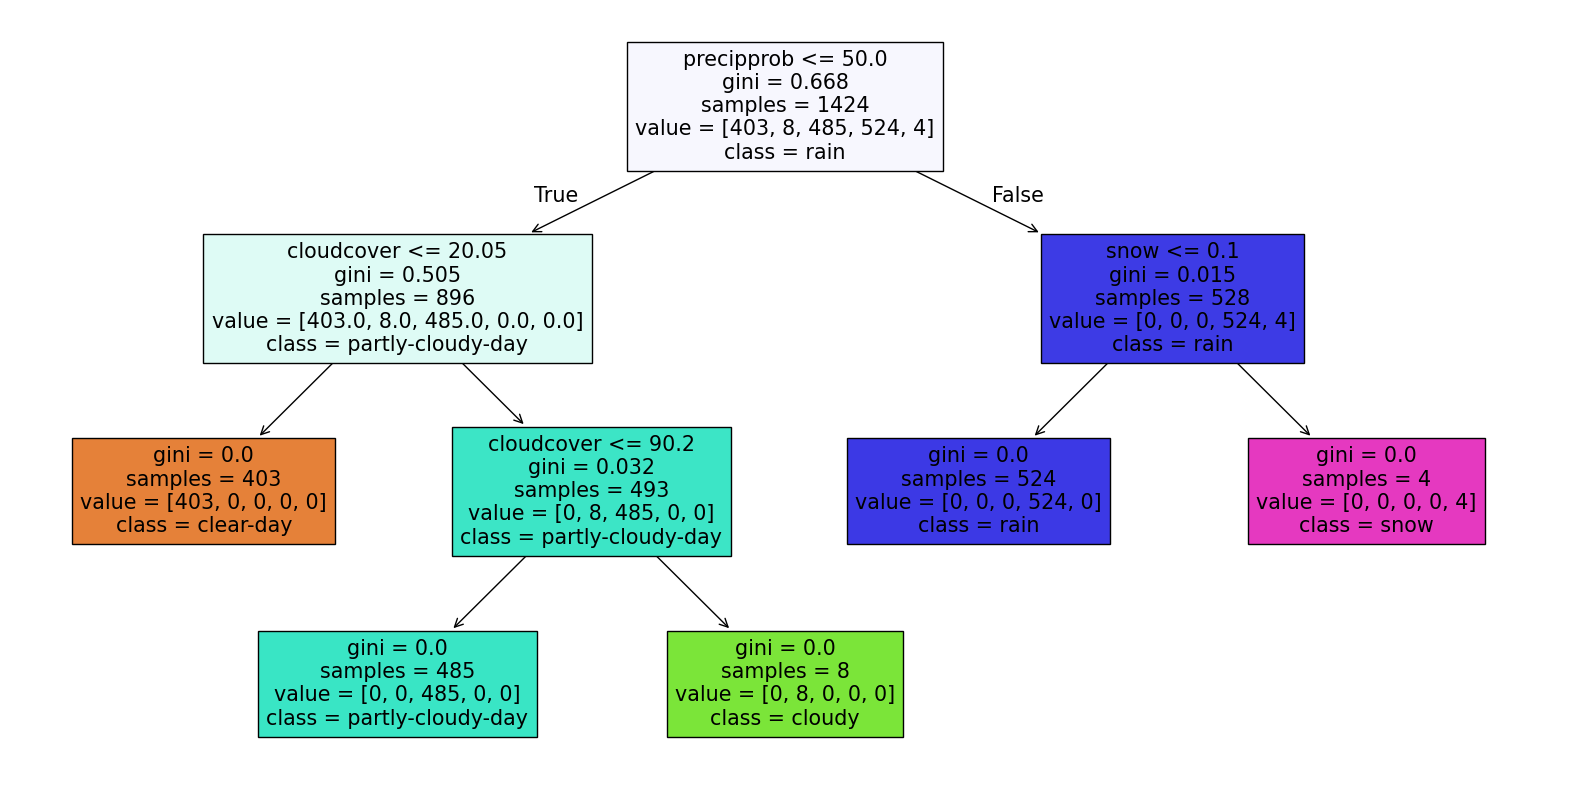

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.calibration import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("Madrid 2022-02-08 to 2024-11-01.csv")
df2 = pd.read_csv("madrid 2019-04-08 to 2022-01-01.csv")
df3 =pd.read_csv("madrid 2022-01-02 to 2022-02-07.csv")
df = pd.concat([df, df2, df3], ignore_index=True)

df["preciptype"].unique()
df["icon"].unique()
df

#Categorizar la columna icon
labelencoder=LabelEncoder()
df["icono numero"]= labelencoder.fit_transform(df["icon"])
df


# Definir X (variables independientes)
X = df.drop(columns=["name","datetime","sunrise","sunset", "severerisk", "preciptype", "conditions", "description", "stations", "icon", "icono numero"], axis=1)

# Convertir y a una sola columna con valores categóricos
y = df["icono numero"]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el clasificador de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Definir el grid de parámetros
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best' , 'random']
}

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con los parámetros especificados
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")

# Hacer predicciones
y_pred = grid_search.predict(X_test)

# Evaluar el modelo en el conjunto de prueba
accuracy = grid_search.score(X_test, y_test)
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")

plt.figure(figsize=(20, 10))  # Ajustar el tamaño del gráfico si es necesario
tree.plot_tree(
    grid_search.best_estimator_,
    filled=True,
    feature_names=X.columns,   # Nombres de las características
    class_names=["clear-day", "cloudy", "partly-cloudy-day", "rain", "snow"]  # Convertir clases a string
)
plt.show()

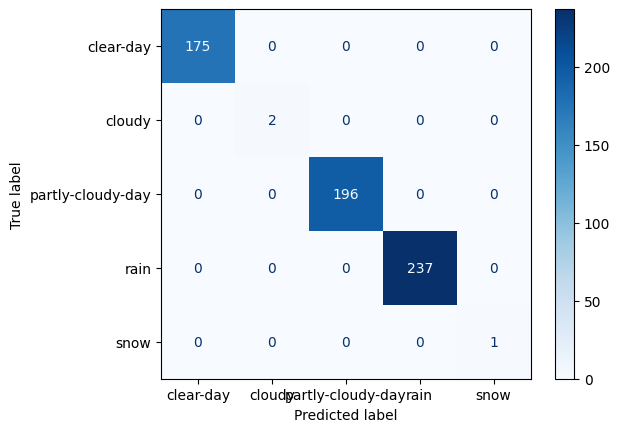

In [3]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test, display_labels=["clear-day", "cloudy", "partly-cloudy-day", "rain", "snow"],cmap="Blues")


Como conclusión, podemos decir este modelo es capaz de predecir mejor que el de regresión logística.

In [ ]:
# Creamos la función para ejecutar el modelo con nuevos datos 
import random

nombre_caracteristica = [
 "tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", 
    "humidity", "precip", "precipprob", "precipcover", "snow", "snowdepth", "windgust", 
    "windspeed", "winddir", "sealevelpressure", "cloudcover", "visibility", 
    "solarradiation", "solarenergy", "uvindex", "moonphase"
    
]

# Función para predecir la clase de un animal
def predecir(caracteristicas):
    # Solita al usuario los datos del nuevo registro
    print("Introduce los datos del nuevo registro para predecir su clase:")
    dato_aleatorio = df[caracteristicas].sample(1, random_state=random.randint(0, 10000))
    dato_aleatorio
    # Crear un DataFrame de pandas con los mismos nombres de columna
    

    # Realizar la predicción con el modelo
    y_new = grid_search.predict(dato_aleatorio)
    print(f"Datos introducidos: {dato_aleatorio.T}")
    # Mostrar el resultado de la predicción
    print("Predicción:")
    if y_new == 0:
        print("Clear-day")
    elif y_new == 1:
        print("Cloudy")
    elif y_new == 2:
        print("Partly-cloudy-day")
    elif y_new == 3:
        print("rain")
    else:
        print("snow")

predecir(nombre_caracteristica)



Introduce los datos del nuevo registro para predecir su clase:
Datos introducidos:                        854
tempmax             25.200
tempmin             11.700
temp                18.500
feelslikemax        25.200
feelslikemin        11.700
feelslike           18.500
dew                  7.400
humidity            51.200
precip               0.125
precipprob         100.000
precipcover          4.170
snow                 0.000
snowdepth            0.000
windgust            25.200
windspeed           12.500
winddir             20.900
sealevelpressure  1014.800
cloudcover          36.600
visibility          16.400
solarradiation     375.300
solarenergy         32.400
uvindex             10.000
moonphase            0.160
Predicción:
rain
